In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Shlok/Dataset(2007-08)

In [ ]:
#From years (2007-2008)

import pandas as pd
import numpy as np

#Find the relevant data files
#"Demographic Variables and Sample Weights" for demographics
#"Diabetes" for diabetes questionnaire data
#"Vitamin D" for vitamin D levels in laboratory data
#"Body Measures" in examination data
# Read XPT files
demographics = pd.read_sas('DEMO_E.XPT')
diabetes = pd.read_sas('DIQ_E.XPT')
vitamin_d = pd.read_sas('VID_E.XPT')
body_measures = pd.read_sas('BMX_E.XPT')
bloodpressure_measures = pd.read_sas('BPX_E.XPT')

# Merge datasets on the unique identifier (SEQN)
merged_data = demographics.merge(diabetes, on='SEQN') \
                          .merge(vitamin_d, on='SEQN') \
                          .merge(bloodpressure_measures, on='SEQN')\
                          .merge(body_measures, on='SEQN')

# Select relevant variables
relevant_vars = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BMXBMI',
                 'DIQ010', 'LBXVE3MS', 'LBXVIDMS', 'BPXSY1', 'BPXDI1']

new_dataset = merged_data[relevant_vars].copy()

# Rename columns for clarity
new_dataset.columns = ['ID', 'Gender', 'Age', 'Race', 'BMI',
                       'Diabetes_Diagnosis', 'HbA1c', 'Vitamin_D',
                       'Systolic_BP', 'Diastolic_BP']

# Filter for diabetic patients (self-reported diagnosis or HbA1c >= 6.5%)
new_dataset = new_dataset[(new_dataset['Diabetes_Diagnosis'] == 1) |
                          (new_dataset['HbA1c'] >= 6.5)]

# Create binary classification for vitamin D deficiency (< 20 ng/mL)
new_dataset['Vitamin_D_Deficient'] = (new_dataset['Vitamin_D'] < 20).astype(int)

# Handle missing values (you may want to use more sophisticated imputation methods)
new_dataset = new_dataset.dropna()

# Save the new dataset
new_dataset.to_csv('/content/drive/MyDrive/Shlok/Prepared_Datasets/diabetic_vitamin_d_dataset_2007-08.csv', index=False)

print(new_dataset.head())
print(f"Dataset shape: {new_dataset.shape}")

# Print the number of classes in Vitamin_D_Deficient column
vitamin_d_classes = new_dataset['Vitamin_D_Deficient'].value_counts()
print("\nNumber of classes in Vitamin_D_Deficient column:")
print(vitamin_d_classes)
print(f"\nTotal number of classes: {len(vitamin_d_classes)}")

         ID  Gender   Age  Race    BMI  Diabetes_Diagnosis  HbA1c  Vitamin_D  \
2   41477.0     1.0  71.0   3.0  30.05                 1.0   2.42       81.8   
8   41483.0     1.0  66.0   4.0  44.06                 1.0   1.16       53.3   
15  41491.0     2.0  11.0   3.0  15.69                 2.0  10.10       70.2   
19  41495.0     1.0  61.0   3.0  25.53                 3.0   6.93       76.5   
20  41496.0     2.0  64.0   1.0  28.37                 1.0   2.11       98.0   

    Systolic_BP  Diastolic_BP  Vitamin_D_Deficient  
2         144.0          60.0                    0  
8         110.0          62.0                    0  
15        120.0          76.0                    0  
19        102.0          64.0                    0  
20        192.0          86.0                    0  
Dataset shape: (944, 11)

Number of classes in Vitamin_D_Deficient column:
Vitamin_D_Deficient
0    930
1     14
Name: count, dtype: int64

Total number of classes: 2


In [ ]:
%cd /content/drive/MyDrive/Shlok/Dataset(2009-10)

In [ ]:
#From years (2009-2010)

import pandas as pd
import numpy as np

#Find the relevant data files
#"Demographic Variables and Sample Weights" for demographics
#"Diabetes" for diabetes questionnaire data
#"Vitamin D" for vitamin D levels in laboratory data
#"Body Measures" in examination data
# Read XPT files
demographics = pd.read_sas('DEMO_F.XPT')
diabetes = pd.read_sas('DIQ_F.XPT')
vitamin_d = pd.read_sas('VID_F.XPT')
body_measures = pd.read_sas('BMX_F.XPT')
bloodpressure_measures = pd.read_sas('BPX_F.XPT')

# Merge datasets on the unique identifier (SEQN)
merged_data = demographics.merge(diabetes, on='SEQN') \
                          .merge(vitamin_d, on='SEQN') \
                          .merge(bloodpressure_measures, on='SEQN')\
                          .merge(body_measures, on='SEQN')

# Select relevant variables
relevant_vars = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BMXBMI',
                 'DIQ010', 'LBXVE3MS', 'LBXVIDMS', 'BPXSY1', 'BPXDI1']

new_dataset = merged_data[relevant_vars].copy()

# Rename columns for clarity
new_dataset.columns = ['ID', 'Gender', 'Age', 'Race', 'BMI',
                       'Diabetes_Diagnosis', 'HbA1c', 'Vitamin_D',
                       'Systolic_BP', 'Diastolic_BP']

# Filter for diabetic patients (self-reported diagnosis or HbA1c >= 6.5%)
new_dataset = new_dataset[(new_dataset['Diabetes_Diagnosis'] == 1) |
                          (new_dataset['HbA1c'] >= 6.5)]

# Create binary classification for vitamin D deficiency (< 20 ng/mL)
new_dataset['Vitamin_D_Deficient'] = (new_dataset['Vitamin_D'] < 20).astype(int)

# Handle missing values (you may want to use more sophisticated imputation methods)
new_dataset = new_dataset.dropna()

# Save the new dataset
new_dataset.to_csv('/content/drive/MyDrive/Shlok/Prepared_Datasets/diabetic_vitamin_d_dataset_2009-10.csv', index=False)

print(new_dataset.head())
print(f"Dataset shape: {new_dataset.shape}")

# Print the number of classes in Vitamin_D_Deficient column
vitamin_d_classes = new_dataset['Vitamin_D_Deficient'].value_counts()
print("\nNumber of classes in Vitamin_D_Deficient column:")
print(vitamin_d_classes)
print(f"\nTotal number of classes: {len(vitamin_d_classes)}")

<ipython-input-20-24d3ee3e2bd7>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Vitamin_D_Deficient'] = (new_dataset['Vitamin_D'] < 20).astype(int)


         ID  Gender   Age  Race    BMI  Diabetes_Diagnosis  HbA1c  Vitamin_D  \
4   51628.0     2.0  60.0   4.0  42.39                 1.0   2.40       49.2   
11  51635.0     1.0  80.0   3.0  27.62                 1.0   4.65       94.1   
18  51645.0     1.0  66.0   1.0  28.25                 2.0   7.23       71.2   
19  51646.0     1.0   8.0   3.0  20.64                 2.0  12.20      112.0   
26  51653.0     1.0  44.0   3.0  29.10                 2.0  10.10       93.5   

    Systolic_BP  Diastolic_BP  Vitamin_D_Deficient  
4         154.0          70.0                    0  
11        126.0          62.0                    0  
18        146.0          68.0                    0  
19        114.0          46.0                    0  
26        118.0          90.0                    0  
Dataset shape: (1250, 11)

Number of classes in Vitamin_D_Deficient column:
Vitamin_D_Deficient
0    1236
1      14
Name: count, dtype: int64

Total number of classes: 2


In [ ]:
%cd /content/drive/MyDrive/Shlok/Dataset(2011-12)

In [ ]:
#From years (2011-2012)

import pandas as pd
import numpy as np

#Find the relevant data files
#"Demographic Variables and Sample Weights" for demographics
#"Diabetes" for diabetes questionnaire data
#"Vitamin D" for vitamin D levels in laboratory data
#"Body Measures" in examination data
# Read XPT files
demographics = pd.read_sas('DEMO_G.XPT')
diabetes = pd.read_sas('DIQ_G.XPT')
vitamin_d = pd.read_sas('VID_G.XPT')
body_measures = pd.read_sas('BMX_G.XPT')
bloodpressure_measures = pd.read_sas('BPX_G.XPT')

# Merge datasets on the unique identifier (SEQN)
merged_data = demographics.merge(diabetes, on='SEQN') \
                          .merge(vitamin_d, on='SEQN') \
                          .merge(bloodpressure_measures, on='SEQN')\
                          .merge(body_measures, on='SEQN')

# Select relevant variables
relevant_vars = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BMXBMI',
                 'DIQ010', 'LBXVE3MS', 'LBXVIDMS', 'BPXSY1', 'BPXDI1']

new_dataset = merged_data[relevant_vars].copy()

# Rename columns for clarity
new_dataset.columns = ['ID', 'Gender', 'Age', 'Race', 'BMI',
                       'Diabetes_Diagnosis', 'HbA1c', 'Vitamin_D',
                       'Systolic_BP', 'Diastolic_BP']

# Filter for diabetic patients (self-reported diagnosis or HbA1c >= 6.5%)
new_dataset = new_dataset[(new_dataset['Diabetes_Diagnosis'] == 1) |
                          (new_dataset['HbA1c'] >= 6.5)]

# Create binary classification for vitamin D deficiency (< 20 ng/mL)
new_dataset['Vitamin_D_Deficient'] = (new_dataset['Vitamin_D'] < 20).astype(int)

# Handle missing values (you may want to use more sophisticated imputation methods)
new_dataset = new_dataset.dropna()

# Save the new dataset
new_dataset.to_csv('/content/drive/MyDrive/Shlok/Prepared_Datasets/diabetic_vitamin_d_dataset_2011-12.csv', index=False)

print(new_dataset.head())
print(f"Dataset shape: {new_dataset.shape}")

# Print the number of classes in Vitamin_D_Deficient column
vitamin_d_classes = new_dataset['Vitamin_D_Deficient'].value_counts()
print("\nNumber of classes in Vitamin_D_Deficient column:")
print(vitamin_d_classes)
print(f"\nTotal number of classes: {len(vitamin_d_classes)}")

         ID  Gender   Age  Race   BMI  Diabetes_Diagnosis  HbA1c  Vitamin_D  \
47  62215.0     2.0  65.0   3.0  26.7                 1.0   2.28       43.0   
48  62217.0     2.0  77.0   1.0  30.6                 1.0   1.16       31.2   
58  62227.0     1.0  19.0   3.0  22.7                 2.0  26.20      137.0   
59  62228.0     1.0  50.0   3.0  43.4                 1.0   4.29       51.5   
61  62230.0     1.0  75.0   3.0  29.7                 2.0   9.98       98.9   

    Systolic_BP  Diastolic_BP  Vitamin_D_Deficient  
47        132.0          72.0                    0  
48        136.0          56.0                    0  
58        106.0          74.0                    0  
59        116.0          74.0                    0  
61        108.0          80.0                    0  
Dataset shape: (1202, 11)

Number of classes in Vitamin_D_Deficient column:
Vitamin_D_Deficient
0    1191
1      11
Name: count, dtype: int64

Total number of classes: 2


In [ ]:
%cd /content/drive/MyDrive/Shlok/Dataset(2013-14)

In [ ]:
#From years (2013-2014)

import pandas as pd
import numpy as np

#Find the relevant data files
#"Demographic Variables and Sample Weights" for demographics
#"Diabetes" for diabetes questionnaire data
#"Vitamin D" for vitamin D levels in laboratory data
#"Body Measures" in examination data
# Read XPT files
demographics = pd.read_sas('DEMO_H.XPT')
diabetes = pd.read_sas('DIQ_H.XPT')
vitamin_d = pd.read_sas('VID_H.XPT')
body_measures = pd.read_sas('BMX_H.XPT')
bloodpressure_measures = pd.read_sas('BPX_H.XPT')

# Merge datasets on the unique identifier (SEQN)
merged_data = demographics.merge(diabetes, on='SEQN') \
                          .merge(vitamin_d, on='SEQN') \
                          .merge(bloodpressure_measures, on='SEQN')\
                          .merge(body_measures, on='SEQN')

# Select relevant variables
relevant_vars = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BMXBMI',
                 'DIQ010', 'LBXVE3MS', 'LBXVIDMS', 'BPXSY1', 'BPXDI1']

new_dataset = merged_data[relevant_vars].copy()

# Rename columns for clarity
new_dataset.columns = ['ID', 'Gender', 'Age', 'Race', 'BMI',
                       'Diabetes_Diagnosis', 'HbA1c', 'Vitamin_D',
                       'Systolic_BP', 'Diastolic_BP']

# Filter for diabetic patients (self-reported diagnosis or HbA1c >= 6.5%)
new_dataset = new_dataset[(new_dataset['Diabetes_Diagnosis'] == 1) |
                          (new_dataset['HbA1c'] >= 6.5)]

# Create binary classification for vitamin D deficiency (< 20 ng/mL)
new_dataset['Vitamin_D_Deficient'] = (new_dataset['Vitamin_D'] < 20).astype(int)

# Handle missing values (you may want to use more sophisticated imputation methods)
new_dataset = new_dataset.dropna()

# Save the new dataset
new_dataset.to_csv('/content/drive/MyDrive/Shlok/Prepared_Datasets/diabetic_vitamin_d_dataset_2013-14.csv', index=False)

print(new_dataset.head())
print(f"Dataset shape: {new_dataset.shape}")

# Print the number of classes in Vitamin_D_Deficient column
vitamin_d_classes = new_dataset['Vitamin_D_Deficient'].value_counts()
print("\nNumber of classes in Vitamin_D_Deficient column:")
print(vitamin_d_classes)
print(f"\nTotal number of classes: {len(vitamin_d_classes)}")

         ID  Gender   Age  Race   BMI  Diabetes_Diagnosis  HbA1c  Vitamin_D  \
0   73557.0     1.0  69.0   4.0  26.7                 1.0   1.16       28.9   
1   73558.0     1.0  54.0   3.0  28.6                 1.0   2.24       61.9   
2   73559.0     1.0  72.0   3.0  28.9                 1.0  14.70      126.0   
11  73571.0     1.0  76.0   3.0  34.4                 1.0   4.94       69.4   
50  73610.0     1.0  43.0   3.0  28.9                 2.0   8.21       86.1   

    Systolic_BP  Diastolic_BP  Vitamin_D_Deficient  
0         122.0          72.0                    0  
1         156.0          62.0                    0  
2         140.0          90.0                    0  
11        124.0          68.0                    0  
50        128.0          78.0                    0  
Dataset shape: (1277, 11)

Number of classes in Vitamin_D_Deficient column:
Vitamin_D_Deficient
0    1271
1       6
Name: count, dtype: int64

Total number of classes: 2


In [ ]:
%cd /content/drive/MyDrive/Shlok/Dataset(2015-16)

In [ ]:
#From years (2015-2016)

import pandas as pd
import numpy as np

#Find the relevant data files
#"Demographic Variables and Sample Weights" for demographics
#"Diabetes" for diabetes questionnaire data
#"Vitamin D" for vitamin D levels in laboratory data
#"Body Measures" in examination data
# Read XPT files
demographics = pd.read_sas('DEMO_I.XPT')
diabetes = pd.read_sas('DIQ_I.XPT')
vitamin_d = pd.read_sas('VID_I.XPT')
body_measures = pd.read_sas('BMX_I.XPT')
bloodpressure_measures = pd.read_sas('BPX_I.XPT')

# Merge datasets on the unique identifier (SEQN)
merged_data = demographics.merge(diabetes, on='SEQN') \
                          .merge(vitamin_d, on='SEQN') \
                          .merge(bloodpressure_measures, on='SEQN')\
                          .merge(body_measures, on='SEQN')

# Select relevant variables
relevant_vars = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BMXBMI',
                 'DIQ010', 'LBXVE3MS', 'LBXVIDMS', 'BPXSY1', 'BPXDI1']

new_dataset = merged_data[relevant_vars].copy()

# Rename columns for clarity
new_dataset.columns = ['ID', 'Gender', 'Age', 'Race', 'BMI',
                       'Diabetes_Diagnosis', 'HbA1c', 'Vitamin_D',
                       'Systolic_BP', 'Diastolic_BP']

# Filter for diabetic patients (self-reported diagnosis or HbA1c >= 6.5%)
new_dataset = new_dataset[(new_dataset['Diabetes_Diagnosis'] == 1) |
                          (new_dataset['HbA1c'] >= 6.5)]

# Create binary classification for vitamin D deficiency (< 20 ng/mL)
new_dataset['Vitamin_D_Deficient'] = (new_dataset['Vitamin_D'] < 20).astype(int)

# Handle missing values (you may want to use more sophisticated imputation methods)
new_dataset = new_dataset.dropna()

# Save the new dataset
new_dataset.to_csv('/content/drive/MyDrive/Shlok/Prepared_Datasets/diabetic_vitamin_d_dataset_2015-16.csv', index=False)

print(new_dataset.head())
print(f"Dataset shape: {new_dataset.shape}")

# Print the number of classes in Vitamin_D_Deficient column
vitamin_d_classes = new_dataset['Vitamin_D_Deficient'].value_counts()
print("\nNumber of classes in Vitamin_D_Deficient column:")
print(vitamin_d_classes)
print(f"\nTotal number of classes: {len(vitamin_d_classes)}")

         ID  Gender   Age  Race   BMI  Diabetes_Diagnosis  HbA1c  Vitamin_D  \
0   83732.0     1.0  62.0   3.0  27.8                 1.0   4.70       76.1   
2   83734.0     1.0  78.0   3.0  28.8                 1.0   8.89       87.5   
12  83744.0     1.0  56.0   4.0  33.6                 1.0   2.81       59.2   
22  83754.0     2.0  67.0   2.0  43.7                 2.0   8.52       77.6   
25  83757.0     2.0  57.0   2.0  35.4                 1.0   1.93       38.8   

    Systolic_BP  Diastolic_BP  Vitamin_D_Deficient  
0         128.0          70.0                    0  
2         138.0          46.0                    0  
12        178.0         116.0                    0  
22        124.0          76.0                    0  
25        134.0          68.0                    0  
Dataset shape: (1523, 11)

Number of classes in Vitamin_D_Deficient column:
Vitamin_D_Deficient
0    1512
1      11
Name: count, dtype: int64

Total number of classes: 2


In [ ]:
%cd /content/drive/MyDrive/Shlok/Dataset(2017-18)

In [ ]:
#From years (2017-2018)

import pandas as pd
import numpy as np

#Find the relevant data files
#"Demographic Variables and Sample Weights" for demographics
#"Diabetes" for diabetes questionnaire data
#"Vitamin D" for vitamin D levels in laboratory data
#"Body Measures" in examination data
# Read XPT files
demographics = pd.read_sas('DEMO_J.XPT')
diabetes = pd.read_sas('DIQ_J.XPT')
vitamin_d = pd.read_sas('VID_J.XPT')
body_measures = pd.read_sas('BMX_J.XPT')
bloodpressure_measures = pd.read_sas('BPX_J.XPT')

# Merge datasets on the unique identifier (SEQN)
merged_data = demographics.merge(diabetes, on='SEQN') \
                          .merge(vitamin_d, on='SEQN') \
                          .merge(bloodpressure_measures, on='SEQN')\
                          .merge(body_measures, on='SEQN')

# Select relevant variables
relevant_vars = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BMXBMI',
                 'DIQ010', 'LBXVE3MS', 'LBXVIDMS', 'BPXSY1', 'BPXDI1']

new_dataset = merged_data[relevant_vars].copy()

# Rename columns for clarity
new_dataset.columns = ['ID', 'Gender', 'Age', 'Race', 'BMI',
                       'Diabetes_Diagnosis', 'HbA1c', 'Vitamin_D',
                       'Systolic_BP', 'Diastolic_BP']

# Filter for diabetic patients (self-reported diagnosis or HbA1c >= 6.5%)
new_dataset = new_dataset[(new_dataset['Diabetes_Diagnosis'] == 1) |
                          (new_dataset['HbA1c'] >= 6.5)]

# Create binary classification for vitamin D deficiency (< 20 ng/mL)
new_dataset['Vitamin_D_Deficient'] = (new_dataset['Vitamin_D'] < 20).astype(int)

# Handle missing values (you may want to use more sophisticated imputation methods)
new_dataset = new_dataset.dropna()

# Save the new dataset
new_dataset.to_csv('/content/drive/MyDrive/Shlok/Prepared_Datasets/diabetic_vitamin_d_dataset_2017-18.csv', index=False)

print(new_dataset.head())
print(f"Dataset shape: {new_dataset.shape}")

# Print the number of classes in Vitamin_D_Deficient column
vitamin_d_classes = new_dataset['Vitamin_D_Deficient'].value_counts()
print("\nNumber of classes in Vitamin_D_Deficient column:")
print(vitamin_d_classes)
print(f"\nTotal number of classes: {len(vitamin_d_classes)}")

         ID  Gender   Age  Race   BMI  Diabetes_Diagnosis  HbA1c  Vitamin_D  \
7   93711.0     1.0  56.0   5.0  21.3                 2.0  10.80      165.0   
12  93716.0     1.0  61.0   5.0  30.7                 2.0   9.74       96.2   
19  93723.0     1.0  64.0   3.0  22.4                 3.0   9.71      131.0   
26  93730.0     1.0  57.0   2.0  28.6                 1.0   4.46       50.8   
37  93742.0     1.0  72.0   4.0  33.9                 1.0   8.56      108.0   

    Systolic_BP  Diastolic_BP  Vitamin_D_Deficient  
7         108.0          68.0                    0  
12        120.0          72.0                    0  
19        124.0          72.0                    0  
26        134.0          74.0                    0  
37        166.0          90.0                    0  
Dataset shape: (1365, 11)

Number of classes in Vitamin_D_Deficient column:
Vitamin_D_Deficient
0    1356
1       9
Name: count, dtype: int64

Total number of classes: 2


In [ ]:
%cd /content/drive/MyDrive/Shlok/Prepared_Datasets

In [ ]:
import pandas as pd
import glob

# List of all dataset filenames
datasets = [
    'diabetic_vitamin_d_dataset_2007-08.csv',
    'diabetic_vitamin_d_dataset_2009-10.csv',
    'diabetic_vitamin_d_dataset_2011-12.csv',
    'diabetic_vitamin_d_dataset_2013-14.csv',
    'diabetic_vitamin_d_dataset_2015-16.csv',
    'diabetic_vitamin_d_dataset_2017-18.csv'
]

# Read the main dataset (2007-08)
main_df = pd.read_csv('diabetic_vitamin_d_dataset_2007-08.csv')

# Initialize an empty list to store data from other datasets
all_data = []

# Process each dataset
for dataset in datasets[1:]:  # Skip the first dataset as it's already loaded
    df = pd.read_csv(dataset)

    # Filter rows where Vitamin_D_Deficient == 1
    deficient = df[df['Vitamin_D_Deficient'] == 1]

    # Append to the list
    all_data.append(deficient)

# Concatenate all data
all_additional = pd.concat(all_data, ignore_index=True)

# Combine main_df with all_additional
combined_df = pd.concat([main_df, all_additional], ignore_index=True)

# Remove duplicate rows based on 'ID', keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset='ID', keep='first')

# Sort the combined dataset by 'ID' in ascending order
combined_df = combined_df.sort_values('ID')

# Reset the index
combined_df = combined_df.reset_index(drop=True)

# Save the combined dataset
combined_df.to_csv('modified_vitamin_d_dataset.csv', index=False)

print("Combined dataset has been created and saved as 'modified_vitamin_d_dataset.csv'")
print(f"Total number of rows in the combined dataset: {len(combined_df)}")

print(combined_df.head())
print(f"Dataset shape: {combined_df.shape}")

# Print the number of classes in Vitamin_D_Deficient column
vitamin_d_classes = combined_df['Vitamin_D_Deficient'].value_counts()
print("\nNumber of classes in Vitamin_D_Deficient column:")
print(vitamin_d_classes)
print(f"\nTotal number of classes: {len(vitamin_d_classes)}")


Combined dataset has been created and saved as 'modified_vitamin_d_dataset.csv'
Total number of rows in the combined dataset: 995
        ID  Gender   Age  Race    BMI  Diabetes_Diagnosis  HbA1c  Vitamin_D  \
0  41477.0     1.0  71.0   3.0  30.05                 1.0   2.42       81.8   
1  41483.0     1.0  66.0   4.0  44.06                 1.0   1.16       53.3   
2  41491.0     2.0  11.0   3.0  15.69                 2.0  10.10       70.2   
3  41495.0     1.0  61.0   3.0  25.53                 3.0   6.93       76.5   
4  41496.0     2.0  64.0   1.0  28.37                 1.0   2.11       98.0   

   Systolic_BP  Diastolic_BP  Vitamin_D_Deficient  
0        144.0          60.0                    0  
1        110.0          62.0                    0  
2        120.0          76.0                    0  
3        102.0          64.0                    0  
4        192.0          86.0                    0  
Dataset shape: (995, 11)

Number of classes in Vitamin_D_Deficient column:
Vitamin_

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Read the CSV data
data = pd.read_csv('modified_vitamin_d_dataset.csv')

# Select continuous variables
continuous_vars = ['Age', 'BMI', 'HbA1c', 'Vitamin_D', 'Systolic_BP', 'Diastolic_BP']

# Calculate descriptive statistics
stats = data[continuous_vars].describe()

# Add median to the statistics
stats.loc['median'] = data[continuous_vars].median()

# Reorder the statistics
stats = stats.reindex(['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max'])

# Round the values to 2 decimal places
stats = stats.round(2)

# Print the table
print(stats.to_string())
print ("")
print ("")
# Create the TSV string
tsv_string = "Statistic\t" + "\t".join(stats.columns) + "\n"
for index, row in stats.iterrows():
    tsv_string += f"{index}\t" + "\t".join(map(str, row)) + "\n"

print(tsv_string)

           Age     BMI   HbA1c  Vitamin_D  Systolic_BP  Diastolic_BP
count   995.00  995.00  995.00     995.00       995.00        995.00
mean     51.32   29.21    5.02      71.77       127.15         67.17
std      21.24    7.51    3.79      33.16        21.18         14.74
min       8.00   13.41    1.16      10.80        76.00          0.00
25%      36.00   23.70    1.65      46.60       112.00         59.00
median   57.00   28.38    3.81      70.90       124.00         68.00
75%      68.00   33.61    7.52      93.85       140.00         76.00
max      80.00   65.37   23.10     213.00       222.00        110.00


Statistic	Age	BMI	HbA1c	Vitamin_D	Systolic_BP	Diastolic_BP
count	995.0	995.0	995.0	995.0	995.0	995.0
mean	51.32	29.21	5.02	71.77	127.15	67.17
std	21.24	7.51	3.79	33.16	21.18	14.74
min	8.0	13.41	1.16	10.8	76.0	0.0
25%	36.0	23.7	1.65	46.6	112.0	59.0
median	57.0	28.38	3.81	70.9	124.0	68.0
75%	68.0	33.61	7.52	93.85	140.0	76.0
max	80.0	65.37	23.1	213.0	222.0	110.0



Statistic	Age	BMI	HbA1c	Vitamin_D	Systolic_BP	Diastolic_BP
Age	1.0	0.38	-0.52	-0.35	0.5	0.01
BMI	0.38	1.0	-0.46	-0.45	0.22	0.15
HbA1c	-0.52	-0.46	1.0	0.8	-0.3	0.01
Vitamin_D	-0.35	-0.45	0.8	1.0	-0.25	-0.01
Systolic_BP	0.5	0.22	-0.3	-0.25	1.0	0.26
Diastolic_BP	0.01	0.15	0.01	-0.01	0.26	1.0

Correlation Matrix:
               Age   BMI  HbA1c  Vitamin_D  Systolic_BP  Diastolic_BP
Age           1.00  0.38  -0.52      -0.35         0.50          0.01
BMI           0.38  1.00  -0.46      -0.45         0.22          0.15
HbA1c        -0.52 -0.46   1.00       0.80        -0.30          0.01
Vitamin_D    -0.35 -0.45   0.80       1.00        -0.25         -0.01
Systolic_BP   0.50  0.22  -0.30      -0.25         1.00          0.26
Diastolic_BP  0.01  0.15   0.01      -0.01         0.26          1.00


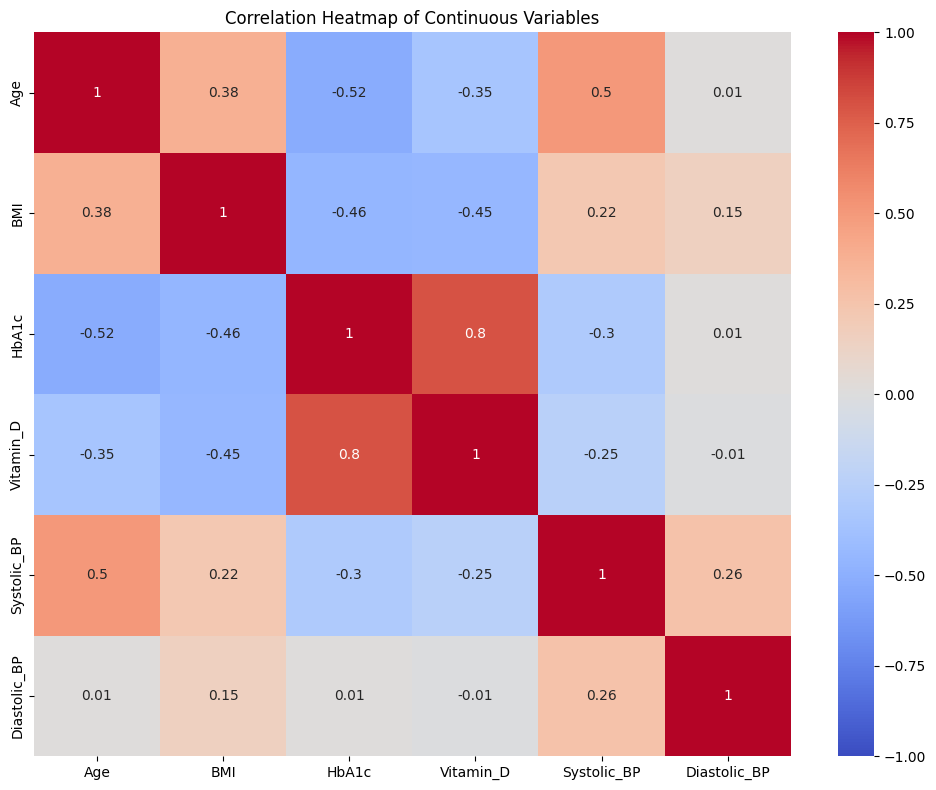


Correlation heatmap has been saved as 'correlation_heatmap.png'


In [ ]:
#Correlation Analysis of Continuous Variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
data = pd.read_csv('modified_vitamin_d_dataset.csv')

# Select continuous variables
continuous_vars = ['Age', 'BMI', 'HbA1c', 'Vitamin_D', 'Systolic_BP', 'Diastolic_BP']

# Calculate the correlation matrix
correlation_matrix = data[continuous_vars].corr()

# Round the correlation coefficients to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

tsv_string = "Statistic\t" + "\t".join(correlation_matrix.columns) + "\n"
for index, row in correlation_matrix.iterrows():
    tsv_string += f"{index}\t" + "\t".join(map(str, row)) + "\n"

print(tsv_string)

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Continuous Variables')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Projects_2024/NCI/Shlok/Plots/Data/correlation_heatmap.png')
plt.show()
plt.close()

print("\nCorrelation heatmap has been saved as 'correlation_heatmap.png'")

In [ ]:
#Data Quality Assessment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
data = pd.read_csv('modified_vitamin_d_dataset.csv')

# 1. Basic Information
print("1. Basic Information:")
print(data.info())
print("\nDataset Shape:", data.shape)

# 2. Missing Values
print("\n2. Missing Values:")
missing_values = data.isnull().sum()
missing_percentages = 100 * missing_values / len(data)
missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_table)

# 3. Duplicate Rows
duplicates = data.duplicated().sum()
print(f"\n3. Duplicate Rows: {duplicates}")

# 4. Descriptive Statistics
print("\n4. Descriptive Statistics:")
print(data.describe())

# 5. Data Types
print("\n5. Data Types:")
print(data.dtypes)

# 6. Unique Values in Categorical Variables
categorical_vars = ['Gender', 'Race', 'Diabetes_Diagnosis', 'Vitamin_D_Deficient']
print("\n6. Unique Values in Categorical Variables:")
for var in categorical_vars:
    print(f"\n{var}:")
    print(data[var].value_counts(dropna=False))

# 7. Distribution Plots
continuous_vars = ['Age', 'BMI', 'HbA1c', 'Vitamin_D', 'Systolic_BP', 'Diastolic_BP']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Continuous Variables', fontsize=16)

for i, var in enumerate(continuous_vars):
    sns.histplot(data[var], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Shlok/Plots/Data/distribution_plots.png')
plt.close()

# 8. Box Plots for Outlier Detection
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16)

for i, var in enumerate(continuous_vars):
    sns.boxplot(x=data[var], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Shlok/Plots/Data/boxplots.png')
plt.close()

# 9. Correlation Heatmap
correlation_matrix = data[continuous_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Continuous Variables')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Shlok/Plots/Data/correlation_heatmap.png')
plt.close()

print("\nFigures have been saved: 'distribution_plots.png', 'boxplots.png', and 'correlation_heatmap.png'")

# 10. Check for Implausible Values
print("\n10. Implausible Values:")
implausible_conditions = {
    'Age': (data['Age'] < 0) | (data['Age'] > 120),
    'BMI': (data['BMI'] < 10) | (data['BMI'] > 100),
    'HbA1c': (data['HbA1c'] < 0) | (data['HbA1c'] > 25),
    'Vitamin_D': (data['Vitamin_D'] < 0) | (data['Vitamin_D'] > 300),
    'Systolic_BP': (data['Systolic_BP'] < 50) | (data['Systolic_BP'] > 250),
    'Diastolic_BP': (data['Diastolic_BP'] < 20) | (data['Diastolic_BP'] > 150)
}

for var, condition in implausible_conditions.items():
    implausible_count = condition.sum()
    print(f"{var}: {implausible_count} implausible values")
    if implausible_count > 0:
        print(data[condition][var].to_string())
    print()


1. Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   995 non-null    float64
 1   Gender               995 non-null    float64
 2   Age                  995 non-null    float64
 3   Race                 995 non-null    float64
 4   BMI                  995 non-null    float64
 5   Diabetes_Diagnosis   995 non-null    float64
 6   HbA1c                995 non-null    float64
 7   Vitamin_D            995 non-null    float64
 8   Systolic_BP          995 non-null    float64
 9   Diastolic_BP         995 non-null    float64
 10  Vitamin_D_Deficient  995 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 85.6 KB
None

Dataset Shape: (995, 11)

2. Missing Values:
                     Missing Values  Percentage
ID                                0         0.0
Gender                  

#Machine Learning Models


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Load the data
data = pd.read_csv('modified_vitamin_d_dataset.csv')

# Redefine the target variable
data['Vitamin_D_Deficient'] = (data['Vitamin_D'] < 20).astype(int)

# Separate features and target
X = data.drop(['ID', 'Vitamin_D_Deficient', 'Vitamin_D'], axis=1)
y = data['Vitamin_D_Deficient']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Gender', 'Race', 'Diabetes_Diagnosis'])

# Feature engineering: bin HbA1c levels
X['HbA1c_Category'] = pd.cut(X['HbA1c'], bins=[0, 5.7, 6.4, np.inf], labels=['Normal', 'Prediabetes', 'Diabetes'])
X = pd.get_dummies(X, columns=['HbA1c_Category'])
X.drop('HbA1c', axis=1, inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with SMOTE and Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Feature importance
feature_importance = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)
for idx in sorted_idx[-10:]:  # Print top 10 features
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       186
           1       0.11      0.15      0.13        13

    accuracy                           0.86       199
   macro avg       0.53      0.53      0.53       199
weighted avg       0.89      0.86      0.87       199

ROC AUC Score: 0.7835
Cross-validation ROC AUC Scores: [0.78722084 0.79962779 0.78287841 0.65653433 0.77191894]
Mean ROC AUC: 0.7596 (+/- 0.1046)
Race_4.0: 0.0436
Race_3.0: 0.0441
Diabetes_Diagnosis_1.0: 0.0444
Diabetes_Diagnosis_2.0: 0.0497
HbA1c_Category_Normal: 0.0778
HbA1c_Category_Diabetes: 0.0934
BMI: 0.1167
Systolic_BP: 0.1257
Diastolic_BP: 0.1368
Age: 0.1392
